In [78]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [80]:
dataset = pd.read_csv('Mall_Customers.csv')

In [82]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [84]:
dataset.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [86]:
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [88]:
dataset['Age'] = pd.to_numeric(dataset['Age'], errors = 'coerce')
dataset['Annual Income (k$)'] = pd.to_numeric(dataset['Annual Income (k$)'], errors = 'coerce')
dataset['Spending Score (1-100)'] = pd.to_numeric(dataset['Spending Score (1-100)'], errors = 'coerce')

In [90]:
Features = dataset[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

In [92]:
Scaler = StandardScaler()
N_Data = Scaler.fit_transform(Features)

In [94]:
k = 4
kmeans = KMeans(n_clusters = k, random_state = 42)
kmeans.fit(N_Data)

C:\Users\nikhi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [96]:
dataset['Cluster'] = kmeans.labels_

In [98]:
dataset[['CustomerID', 'Cluster']]

,CustomerID,Cluster
0,1,2
1,2,2
2,3,2
3,4,2
4,5,2
...,...,...
195,196,1
196,197,3
197,198,1
198,199,3


In [100]:
mean_cluster = dataset.groupby('Cluster')
mean_cluster

In [102]:
pca = PCA(n_components = 2)
Feature_pca = pca.fit_transform(N_Data)

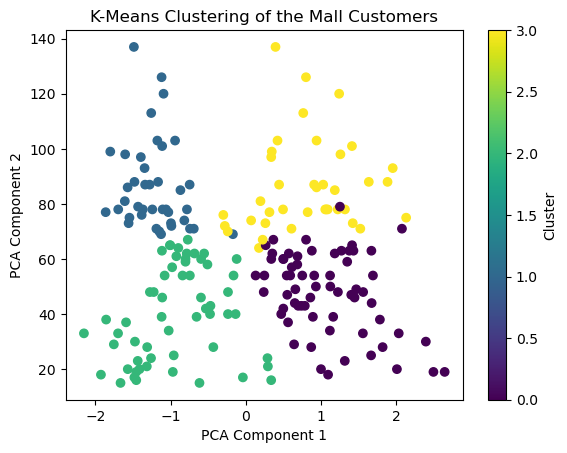

In [104]:
plt.scatter(Feature_pca[:, 0], Features[:, 1], c = kmeans.labels_, cmap = 'viridis', marker = 'o')
plt.title('K-Means Clustering of the Mall Customers')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label = 'Cluster')
plt.show()